In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Pre-process data
x_train = np.expand_dims(x_train, axis=-1)  # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)  # Add channel dimension
y_train = to_categorical(y_train, num_classes=10)  # Convert labels to one-hot encoding
y_test = to_categorical(y_test, num_classes=10)  # Convert labels to one-hot encoding

# Create CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # Convolutional layer with 32 filters and 3x3 kernel
model.add(MaxPooling2D((2, 2)))  # Max pooling layer with 2x2 pool size
model.add(Conv2D(64, (3, 3), activation='relu'))  # Convolutional layer with 64 filters and 3x3 kernel
model.add(MaxPooling2D((2, 2)))  # Max pooling layer with 2x2 pool size
model.add(Flatten())  # Flatten the tensor to 1D
model.add(Dense(64, activation='relu'))  # Fully connected layer with 64 units and ReLU activation
model.add(Dense(10, activation='softmax'))  # Output layer with 10 units for 10 classes and softmax activation

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
469/469 [==============================] - 16s 6ms/step - loss: 0.7430 - accuracy: 0.9097 - val_loss: 0.0905 - val_accuracy: 0.9717
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0744 - accuracy: 0.9779 - val_loss: 0.0647 - val_accuracy: 0.9825
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0484 - accuracy: 0.9853 - val_loss: 0.0605 - val_accuracy: 0.9827
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0384 - accuracy: 0.9874 - val_loss: 0.0527 - val_accuracy: 0.9838
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.0515 - val_accuracy: 0.9853
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0268 - accuracy: 0.9916 - val_loss: 0.0657 - val_accuracy: 0.9812
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0206 -

1/1 [==============================] - 0s 193ms/step


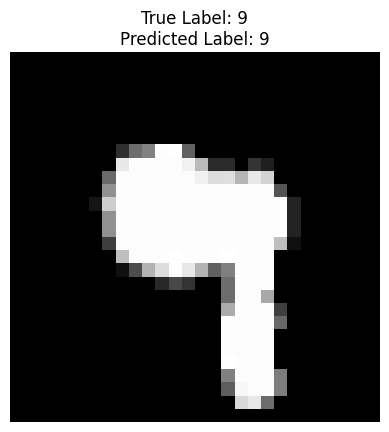

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# # Load MNIST data
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# # Pre-process data
# x_train = np.expand_dims(x_train, axis=-1)  # Add channel dimension
# x_test = np.expand_dims(x_test, axis=-1)  # Add channel dimension

# # Load trained model
# model = load_model('mnist_cnn_model.h5')  # Load the trained model, replace with your model file name

# Choose a random test image for prediction
idx = np.random.randint(0, len(x_test))
test_image = x_test[idx]
true_label = np.argmax(y_test[idx])

# Make prediction
predicted_probs = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(predicted_probs)

# Display the original image and the predicted label
plt.imshow(test_image.squeeze(), cmap='gray')
plt.title(f'True Label: {true_label}\nPredicted Label: {predicted_label}')
plt.axis('off')
plt.show()
